<a href="https://colab.research.google.com/github/AnshulRustogi/Stock-Market-Movement-Predictor/blob/development/model/ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
stock = pd.read_csv('final_stock_data.csv')

In [3]:
stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.0,0.0,1
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.0,0.0,1
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.0,0.0,0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.0,0.0,0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.0,0.0,1


In [4]:
labels = pd.read_csv('news_label.csv')

In [5]:
labels.head()

,Date,Sentiment
0,2012-07-16,0.0
1,2012-07-19,0.0
2,2012-07-23,0.0
3,2012-07-24,0.0
4,2012-07-27,0.0


In [6]:
final = pd.merge(stock, labels)

In [7]:
final.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Movement,Sentiment
0,2012-07-16,18.478158,18.676643,18.475103,18.532818,301260400,0.0,0.0,1,0.0
1,2012-07-19,18.666261,18.790544,18.505029,18.759092,436861600,0.0,0.0,1,0.0
2,2012-07-23,18.150808,18.501977,17.946521,18.438766,487975600,0.0,0.0,0,0.0
3,2012-07-24,18.547165,18.617399,18.276307,18.349901,565132400,0.0,0.0,0,0.0
4,2012-07-27,17.558705,17.889109,17.454271,17.868649,403936400,0.0,0.0,1,0.0


In [8]:
 final = final.drop(['Dividends','Stock Splits','Date'], axis=1)

In [9]:
final.head()

,Open,High,Low,Close,Volume,Movement,Sentiment
0,18.478158,18.676643,18.475103,18.532818,301260400,1,0.0
1,18.666261,18.790544,18.505029,18.759092,436861600,1,0.0
2,18.150808,18.501977,17.946521,18.438766,487975600,0,0.0
3,18.547165,18.617399,18.276307,18.349901,565132400,0,0.0
4,17.558705,17.889109,17.454271,17.868649,403936400,1,0.0


In [10]:
final['Sentiment'].value_counts()

 0.000000    457
 0.500000    106
 0.333333     79
 0.250000     73
 1.000000     61
            ... 
 0.545455      1
-0.045455      1
 0.508475      1
 0.391304      1
-0.833333      1
Name: Sentiment, Length: 275, dtype: int64

In [11]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1991 non-null   float64
 1   High       1991 non-null   float64
 2   Low        1991 non-null   float64
 3   Close      1991 non-null   float64
 4   Volume     1991 non-null   int64  
 5   Movement   1991 non-null   int64  
 6   Sentiment  1991 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 124.4 KB


In [12]:
final.corr(method='pearson')

,Open,High,Low,Close,Volume,Movement,Sentiment
Open,1.000000,0.999912,0.999892,0.999749,-0.390073,-0.005057,-0.049931
High,0.999912,1.000000,0.999875,0.999879,-0.388443,-0.001179,-0.050084
Low,0.999892,0.999875,1.000000,0.999890,-0.392467,0.000166,-0.049125
Close,0.999749,0.999879,0.999890,1.000000,-0.390661,0.004701,-0.048916
Volume,-0.390073,-0.388443,-0.392467,-0.390661,1.000000,-0.065470,-0.067169
Movement,-0.005057,-0.001179,0.000166,0.004701,-0.065470,1.000000,0.050534
Sentiment,-0.049931,-0.050084,-0.049125,-0.048916,-0.067169,0.050534,1.000000


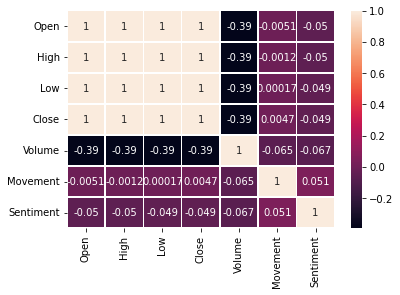

In [13]:
import seaborn as sns
sns.heatmap(final.corr(), linewidth=0.5, annot=True)

In [14]:
 X = final.drop(['Movement'],axis=1)

In [15]:
X

,Open,High,Low,Close,Volume,Sentiment
0,18.478158,18.676643,18.475103,18.532818,301260400,0.000000
1,18.666261,18.790544,18.505029,18.759092,436861600,0.000000
2,18.150808,18.501977,17.946521,18.438766,487975600,0.000000
3,18.547165,18.617399,18.276307,18.349901,565132400,0.000000
4,17.558705,17.889109,17.454271,17.868649,403936400,0.000000
...,...,...,...,...,...,...
1986,134.289993,137.339996,132.160004,135.429993,91533000,0.000000
1987,132.080002,132.389999,129.039993,130.059998,108123900,-0.833333
1988,130.070007,133.080002,129.809998,131.559998,134118500,0.058824
1989,133.419998,137.059998,133.320007,135.869995,81000500,0.600000


In [16]:
y = final['Movement']

In [17]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1986    1
1987    0
1988    1
1989    1
1990    0
Name: Movement, Length: 1991, dtype: int64

# Splitting into train and test

In [18]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Support Vector Machine

In [31]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score
model = svm.SVC() 
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.543859649122807
0.5408291457286433
0.543859649122807


# Decision tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred,y_test))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.5639097744360902
1.0
-0.7578872740163065


# Random forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(metrics.accuracy_score(pred.round(),y_test))
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

0.5739348370927319
0.8736482340801327
-0.05008911733427879
